In [31]:
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.colors as plt_cols

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import time, json, requests, pprint, copy, math, dateutil
from datetime import datetime, timedelta
from argovisHelpers import helpers as avh

import os

In [32]:
API_KEY=''

API_PREFIX_all = 'https://argovis-api.colorado.edu/'
API_PREFIX_drifters = 'https://argovisbeta01.colorado.edu/dapi/'

In [33]:
#fpath = os.path.expanduser('~/Downloads/')
fpath = './'

In [34]:
# startDate = '2019-08-13T00:00:00Z'
# endDate = '2019-08-31T00:00:00Z'

startDate = '2015-01-01T00:00:00Z'
endDate   = '2017-01-01T00:00:00Z'

# startDate = '2000-01-01T00:00:00Z'
# endDate = '2023-03-01T00:00:00Z'


dx = 1
dy = 1

x_edges = np.arange(-180,181,dx)
y_edges = np.arange(-90,91,dy)



In [35]:
# argo = requests.get(url,headers=headers).json()

In [36]:
def map_count_in_bins(name,x_edges,y_edges,dx,dy,fpath,startDate,endDate,vmin_map=1,vmax_map=1000):
    d = globals()[name] 
    lons = d['longitudes']#[x[1] for x in d]
    lats  = d['latitudes']#[x[2] for x in d]
    datetimes  = d['datetimes'] #[datetime.strptime(x[3][0:18]+'Z',"%Y-%m-%dT%H:%M:%SZ") for x in d]
    
    fig = plt.figure(figsize=(21, 7))
    
    h = np.histogram2d(lons, lats,[x_edges, y_edges])
    ax = plt.axes(projection=ccrs.PlateCarree())

    plt.pcolormesh(x_edges[0:-1]+dx/2, y_edges[0:-1]+dy/2, h[0].transpose(),  #60,
             transform=ccrs.PlateCarree(),norm=plt_cols.LogNorm(vmin=vmin_map, vmax=vmax_map ))

    ax.stock_img()
    ax.coastlines()
    
    plt.colorbar()

    plt.savefig(fpath+name+startDate[0:10]+'_'+endDate[0:10]+'.png')
    plt.show()

### Number of profiles per bin for different products: query the info and create a map

The info to create the maps is also saved in a .pkl file.

In [37]:
def create_df(mydict_name,api_output):
    bfr = pd.DataFrame(globals()[api_output])
    
    if 'geolocation' in bfr.keys():
        bfr['id'] = bfr.pop('_id')
        bfr['longitudes'] = bfr.pop('geolocation')
        bfr['latitudes'] = bfr['longitudes']
        bfr['longitudes'] = [x['coordinates'][0] for x in bfr['longitudes']]
        bfr['latitudes'] = [x['coordinates'][1] for x in bfr['latitudes']]
        bfr['datetimes'] = bfr.pop('timestamp')
        #if len(bfr.keys()) > 4:
        #    bfr['tags'] = bfr.pop(4)
        #print(bfr)
    else:
        bfr.rename( columns={0 :'id'}, inplace=True )
        bfr.rename( columns={1 :'longitudes'}, inplace=True )
        bfr.rename( columns={2 :'latitudes'}, inplace=True )
        bfr.rename( columns={3 :'datetimes'}, inplace=True )
        bfr.rename( columns={4 :'source'}, inplace=True )
    return bfr

tc
2024-03-19 17:23:02.061617
2024-03-19 17:23:13.064021
                           id  longitudes  latitudes  \
0     SH092015_20150130180000        69.1      -19.7   
1     SH102015_20150130180000       161.5      -17.2   
2     SH092015_20150130120000        68.5      -19.2   
3     SH102015_20150130120000       161.5      -17.0   
4     SH092015_20150130060000        68.0      -18.4   
...                       ...         ...        ...   
5457  WP302016_20161221120000       141.1        7.1   
5458  SH022016_20161221060000       114.0      -14.3   
5459  WP302016_20161221060000       141.7        6.6   
5460  SH022016_20161221000000       113.8      -14.6   
5461  WP302016_20161221000000       142.5        6.2   

                     datetimes      source  
0     2015-01-30T18:00:00.000Z  [SH092015]  
1     2015-01-30T18:00:00.000Z  [SH102015]  
2     2015-01-30T12:00:00.000Z  [SH092015]  
3     2015-01-30T12:00:00.000Z  [SH102015]  
4     2015-01-30T06:00:00.000Z  [SH092015]  


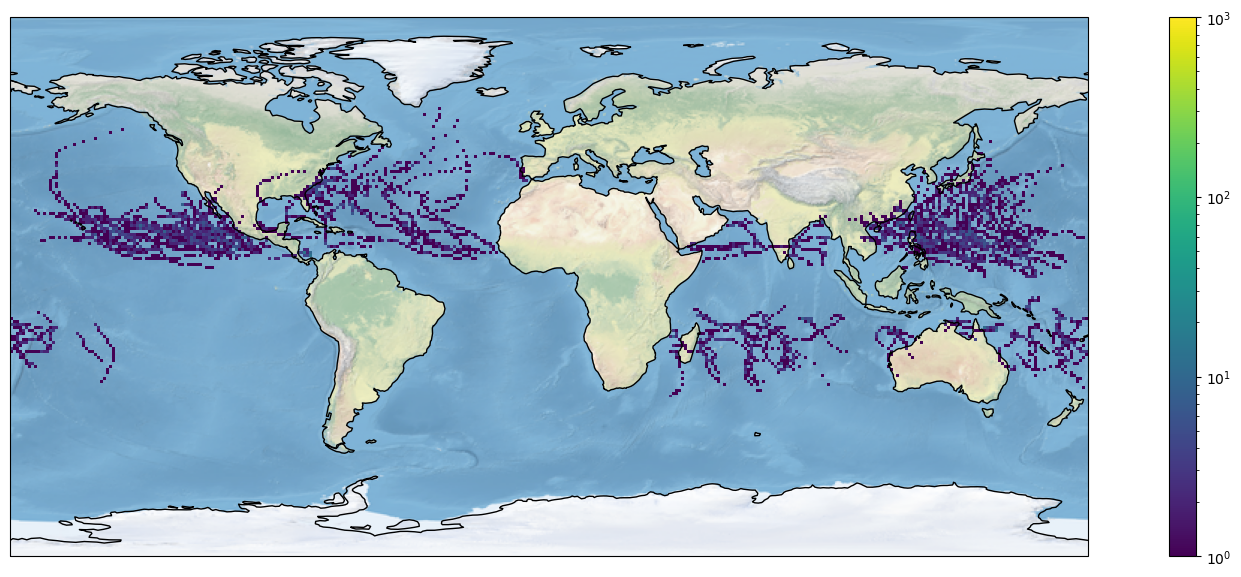

2024-03-19 17:23:14.679061
cchdo
2024-03-19 17:23:14.679215
2024-03-19 17:23:31.057027
                                               id  longitudes  latitudes  \
0     expo_06AQ20141202_sta_082_cast_002_type_btl    12.93330  -49.00000   
1     expo_06AQ20141202_sta_081_cast_001_type_btl     0.00230  -61.00030   
2     expo_06AQ20141202_sta_080_cast_001_type_btl     0.00150  -63.91700   
3     expo_06AQ20141202_sta_078_cast_001_type_btl     0.00220  -66.03600   
4     expo_74JC20150110_sta_030_cast_001_type_btl   -57.99291  -54.73745   
...                                           ...         ...        ...   
3559  expo_320620161224_sta_002_cast_001_type_ctd   -68.50020  -59.33204   
3560  expo_320620161224_sta_001_cast_002_type_ctd   -68.27742  -57.33520   
3561  expo_320620161224_sta_001_cast_001_type_ctd   -68.27726  -57.33582   
3562  expo_33RO20161119_sta_115_cast_001_type_ctd  -103.00050  -23.49950   
3563  expo_33RO20161119_sta_114_cast_001_type_ctd  -103.00020  -22.99850   



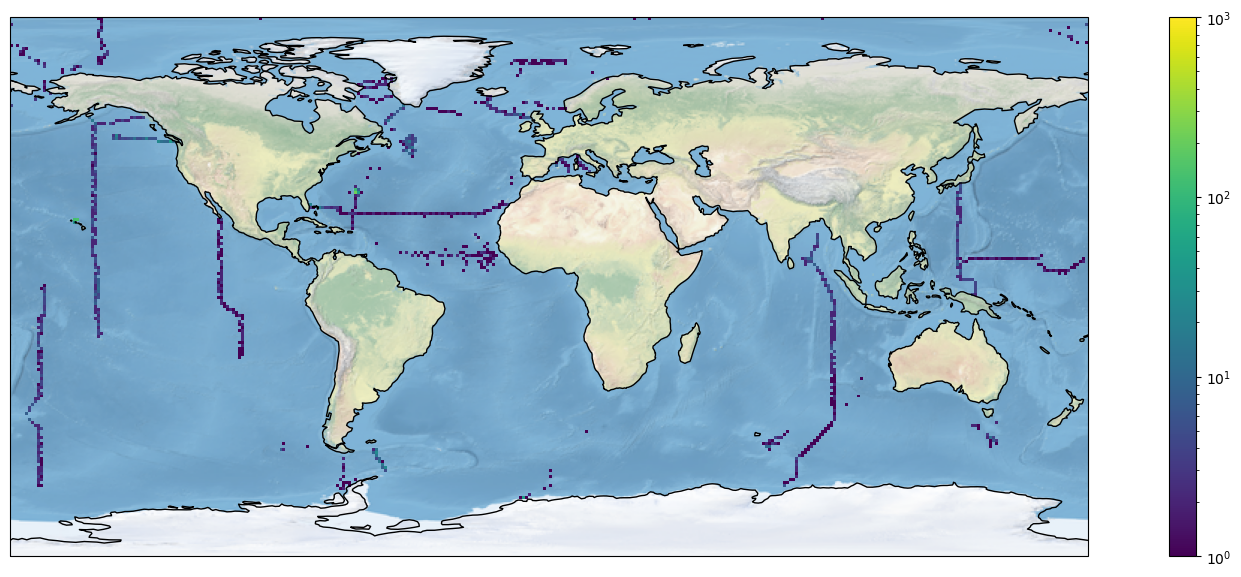

2024-03-19 17:23:32.407225
argo
2024-03-19 17:23:32.407401


KeyboardInterrupt: 

In [38]:
params = {
        'startDate': startDate,
        'endDate': endDate,
        'compression': 'minimal'
    } # 'compression': 'minimal'

for collection in ['tc','cchdo','argo']: #,'drifters'
    print(collection)
    if collection == 'drifters':
        API_PREFIX = API_PREFIX_drifters
    else:
        API_PREFIX = API_PREFIX_all
    print(datetime.now())
    globals()[collection] = avh.query(collection, options=params, apikey=API_KEY, apiroot=API_PREFIX)
    print(datetime.now())
    # create dataframe with columns of interest
    mydict_name = 'df_'+collection
    globals()[mydict_name] = create_df(mydict_name=mydict_name,api_output=collection)
    print(globals()[mydict_name])
    
    # save info to .pkl file
    output = open(fpath+mydict_name+'_'+startDate[0:10]+'_'+endDate[0:10]+'.pkl', 'wb')
    pickle.dump(globals()[mydict_name], output)
    output.close()
    
    # plot map with count at each bin
    map_count_in_bins(name=mydict_name,x_edges=x_edges,y_edges=y_edges,dx=dx,dy=dy, \
                      fpath=fpath,startDate=startDate,endDate=endDate,vmin_map=1,vmax_map=1000)
    print(datetime.now())
    
# longitudes = [x['geolocation']['coordinates'][0] for x in d]
# latitudes  = [x['geolocation']['coordinates'][1] for x in d]

### Info saved in the .pkl files (in the previous cell) is used to create the maps again

In [ ]:
for name in ['df_argo','df_cchdo','df_tc']: # ['df_tc','df_argo','df_cchdo','df_drifters']:
    if name not in globals():
        globals()[name] = pickle.load( open( fpath+name+'_'+startDate[0:10]+'_'+endDate[0:10]+'.pkl', "rb" ) )
    map_count_in_bins(name=name,x_edges=x_edges,y_edges=y_edges,dx=dx,dy=dy, \
                      fpath=fpath,startDate=startDate,endDate=endDate,vmin_map=1,vmax_map=1000)
        

#### Let's plot maps for e.g. only argo_core, argo_bgc, argo_deep, and profiles that are both bgc and deep

In [ ]:
argo_core_only = ['argo_bgc' not in x and 'argo_deep' not in x for x in df_argo['source']]
sum(argo_core_only)


In [ ]:
argo_bgc_only  = ['argo_bgc' in x and 'argo_deep' not in x for x in df_argo['source']]
sum(argo_bgc_only)


In [ ]:
argo_deep_only  = ['argo_bgc' not in x and 'argo_deep' in x for x in df_argo['source']]
sum(argo_deep_only)


In [ ]:
argo_bgc_and_deep  = ['argo_bgc' in x and 'argo_deep' in x for x in df_argo['source']]
sum(argo_bgc_and_deep)

In [ ]:
len(df_argo['source'])==sum(argo_core_only)+sum(argo_bgc_only)+sum(argo_deep_only)+sum(argo_bgc_and_deep)

In [ ]:
# df_argo = pickle.load( open( fpath+"df_argo.pkl", "rb" ) )

In [ ]:
df_argo_core_only = df_argo[argo_core_only].reset_index()
len(df_argo_core_only)


In [ ]:
df_argo_bgc_all = df_argo[[a or b for a, b in zip(argo_bgc_only, argo_bgc_and_deep)]].reset_index()
len(df_argo_bgc_all)


In [ ]:
df_argo_deep_all = df_argo[[a or b for a, b in zip(argo_deep_only, argo_bgc_and_deep)]].reset_index()
len(df_argo_deep_all)


In [ ]:
df_argo_bgc_and_deep = df_argo[argo_bgc_and_deep].reset_index()
len(df_argo_bgc_and_deep)


In [ ]:
for name in ['df_argo_core_only','df_argo_bgc_all','df_argo_deep_all','df_argo_bgc_and_deep']: # ['df_tc','df_argo','df_cchdo','df_drifters']:
    map_count_in_bins(name=name,x_edges=x_edges,y_edges=y_edges,dx=dx,dy=dy, \
                      fpath=fpath,startDate=startDate,endDate=endDate,vmin_map=1,vmax_map=1000)

### Plot number of profiles each year for Argo core, bgc, deep

Create timeseries of years for each argo source

In [ ]:
for name in ['df_argo','df_argo_core_only','df_argo_bgc_all','df_argo_deep_all','df_argo_bgc_and_deep']: 
    bfr = globals()[name]
    globals()[name+'_datetime']   = pd.to_datetime([np.datetime64(x[0:4]+'-'+x[5:7]+'-'+x[8:10]) for x in bfr['datetimes']])
    
    

In [ ]:
years_bins = np.unique(df_argo_datetime.year)-.5
years_bins = np.append(years_bins,max(np.unique(years_bins))+1)

for name in ['df_argo','df_argo_core_only','df_argo_bgc_all','df_argo_deep_all','df_argo_bgc_and_deep']: 
    bfr_datetime = globals()[name+'_datetime']
    bfr_year     = bfr_datetime.year
    globals()[name+'_years_hist'] = plt.hist(bfr_year, bins=years_bins)
    

In [ ]:
#species = ("Adelie", "Chinstrap", "Gentoo")
# penguin_means

argo_tags = {
    'Core': df_argo_years_hist[0],
    'BGC': df_argo_bgc_all_years_hist[0],
    'Deep': df_argo_deep_all_years_hist[0],
} # 

argo_tags_cols = ['k', 'g', 'r']

x = years_bins[0:-1]+0.5  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(28, 7),layout='constrained')

n = 0
for attribute, measurement in argo_tags.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute,color=argo_tags_cols[n])
    ax.bar_label(rects, padding=5, size=18, rotation=90,color=argo_tags_cols[n],fontweight='bold')
    multiplier += 1
    n = n + 1
    
# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Length (mm)')
ax.set_title('Number of Argo profiles by year',size=40)
ax.tick_params(axis='both', labelsize=40)
#ax.set_xticks(x + width, species)
# ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250000)
ax.set_xlabel('Year',size=40)

plt.show()

### Plots for profiles that include e.g. oxygen

In [ ]:
tag_select = '_select_byData_byPres'

params = {
        'startDate': startDate,
        'endDate': endDate,
        'data': 'doxy,except-data-values',
        'presRange': '80,100',
        'compression': 'minimal'
    } # 'compression': 'minimal'

for collection in ['argo']: #,'drifters'
    print(collection)
    if collection == 'drifters':
        API_PREFIX = API_PREFIX_drifters
    else:
        API_PREFIX = API_PREFIX_all
    print(datetime.now())
    globals()[collection] = avh.query(collection, options=params, apikey=API_KEY, apiroot=API_PREFIX)
    print(datetime.now())
    # create dataframe with columns of interest
    mydict_name = 'df_'+collection+tag_select
    globals()[mydict_name] = create_df(mydict_name=mydict_name,api_output=collection)
    
    # save info to .pkl file
    output = open(fpath+mydict_name+'_'+startDate[0:10]+'_'+endDate[0:10]+'.pkl', 'wb')
    pickle.dump(globals()[mydict_name], output)
    output.close()
    
    # plot map with count at each bin
    map_count_in_bins(name=mydict_name,x_edges=x_edges,y_edges=y_edges,dx=dx,dy=dy, \
                      fpath=fpath,startDate=startDate,endDate=endDate,vmin_map=1,vmax_map=1000)
    print(datetime.now())

In [ ]:
df_argo_select_byData_byPres_datetime = pd.to_datetime([np.datetime64(x[0:4]+'-'+x[5:7]+'-'+x[8:10]) for x in df_argo_select_byData_byPres['datetimes']])
df_argo_select_byData_byPres_datetime.year


In [ ]:
bfr_hist = plt.hist(df_argo_select_byData_byPres_datetime.year, bins=years_bins)
plt.close()
fig, ax = plt.subplots(figsize=(20, 10),layout='constrained')
rects = ax.bar(years_bins[0:-1]+0.5, bfr_hist[0], width,color='g')
ax.bar_label(rects, padding=5, size=18, rotation=90,color='g',fontweight='bold')
ax.set_title('Number of Argo profiles that include doxy, by year',size=40)
ax.tick_params(axis='both', labelsize=40)
#ax.set_xticks(x + width, species)
# ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 30000)
ax.set_xlabel('Year',size=40)
